Hi

In [1]:
import ionerdss as ion
import os
import subprocess
from IPython.display import display, Image

In [2]:
pdb_id = '8y7s'
save_folder = '~/Documents/8y7s_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=False)

Successfully downloaded assembly file: /Users/sikao/Documents/8y7s_dir/8y7s-assembly1.cif.gz


In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'B': 'A', 'E': 'A', 'F': 'A', 'A': 'A'}
Homologous chain groups identified:
[['A', 'B', 'E', 'F']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/8y7s_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/8y7s_dir/8y7s_model.json


PyMOL>load /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 4 atoms.
PyMOL>color blue, name INT
 Executive: Colored 12 atoms.
PyMOL>pseudoatom com_A, pos=[-34.339, 24.679, 53.314], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[-41.347, 10.365, 67.061], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, pos=

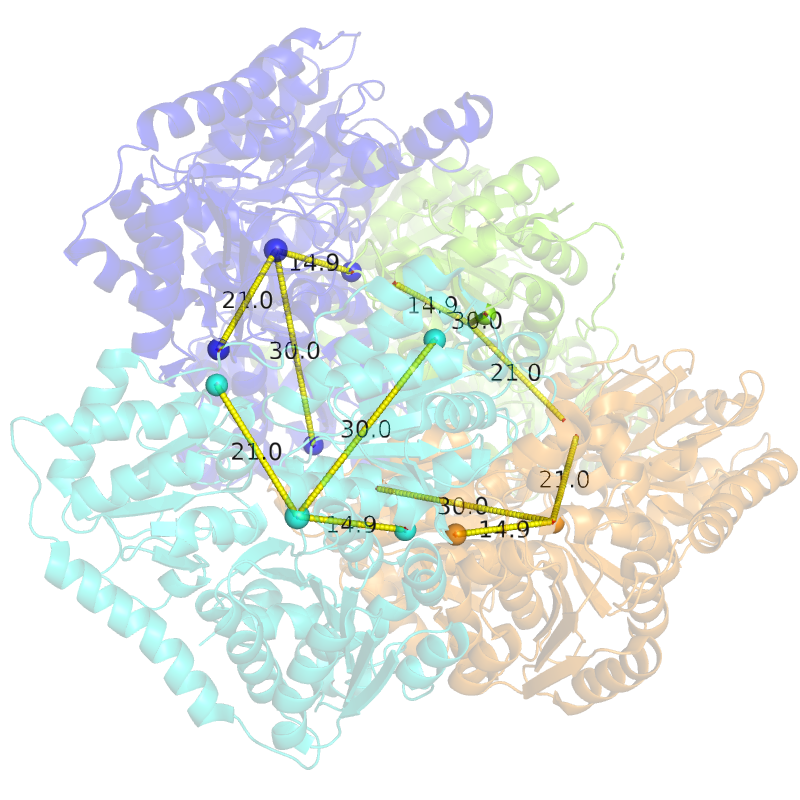

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))

In [ ]:
simulation = ion.Simulation(pdb_model, save_folder)

In [ ]:
simulation.generate_nerdss_input()

In [ ]:
simulation.modify_mol_file('A', 
                           {'D': [20.0, 20.0, 20.0], 
                            'Dr': [0.2, 0.2, 0.2]}) # Example modification

simulation.print_mol_parameters('A')

In [ ]:
simulation.modify_inp_file({'nItr': 1000, 'timeStep': 0.5, 'timeWrite': 100, 'trajWrite': 100, 'pdbWrite': 100, 'A': 200, 'A(A1) + A(A1) <-> A(A1!1).A(A1!1)': {'onRate3Dka': 2000}}) # Example modification
simulation.print_inp_file()

In [ ]:
simulation.install_nerdss(nerdss_path="~/Documents/8y7s_dir") # this will update the nerdss folder if it already exists

In [ ]:
simulation.run_new_simulations(sim_indices=[1, 2, 3], 
                              sim_dir="~/Documents/8y7s_dir/nerdss_output", 
                              nerdss_dir="~/Documents/8y7s_dir/NERDSS", 
                              parallel=False)

In [2]:
analysis = ion.Analysis("./data/8y7s_dir/nerdss_output/")

Detected a batch of 3 simulation directories.


objc[75699]: Class QDarwinBluetoothPermissionHandler is implemented in both /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PyQt6/QtCore.abi3.so (0x118946ed0) and /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PySide6/QtCore.abi3.so (0x15d6bf370). One of the two will be used. Which one is undefined.
objc[75699]: Class QDarwinCalendarPermissionHandler is implemented in both /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PyQt6/QtCore.abi3.so (0x118946f48) and /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PySide6/QtCore.abi3.so (0x15d6bf3e8). One of the two will be used. Which one is undefined.
objc[75699]: Class QDarwinCameraPermissionHandler is implemented in both /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PyQt6/QtCore.abi3.so (0x118946f98) and /Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/PySide6/QtCore.abi3.so (0x15d6bf438). One of the two will be us

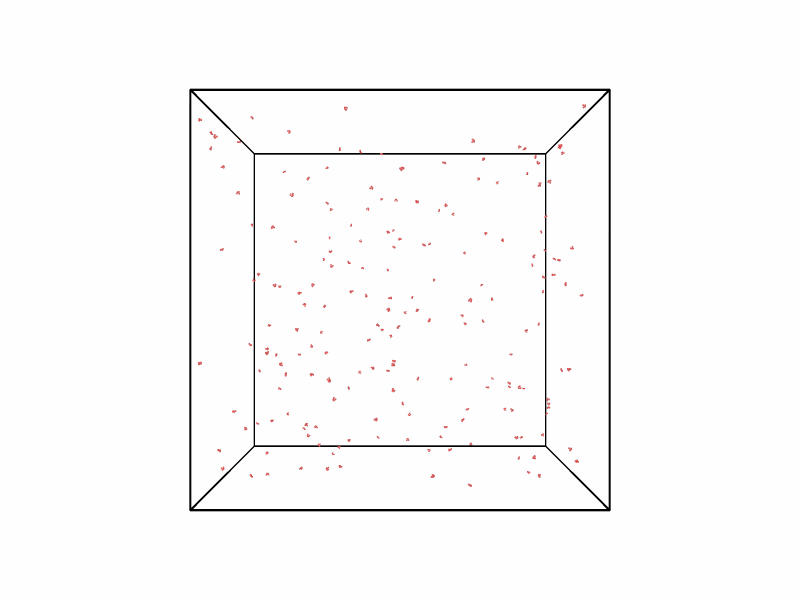

In [3]:
analysis.visualize_trajectory()

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: species
- z-axis: None
- Simulations: 3 selected
- Legend: [['A(A1!1).A(A1!1)']]
- Display mode: both
Processed data for A(A1!1).A(A1!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/A(A1!1).A(A1!1).csv
Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


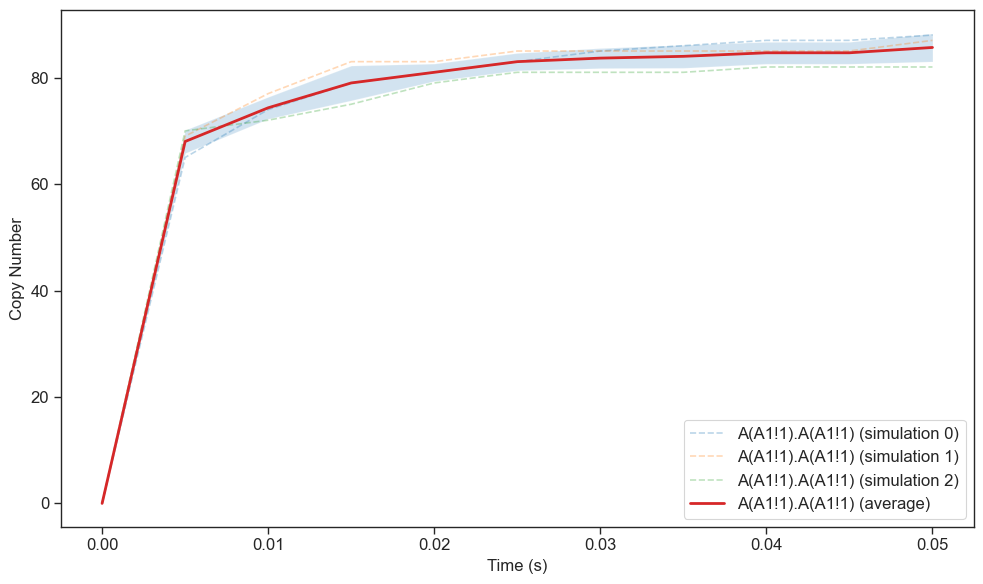

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


In [4]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='species',
                     legend=[['A(A1!1).A(A1!1)'],],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: species
- z-axis: None
- Simulations: 3 selected
- Legend: [['A(A1!1).A(A1!1)']]
- Display mode: average
Processed data for A(A1!1).A(A1!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/A(A1!1).A(A1!1).csv
Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


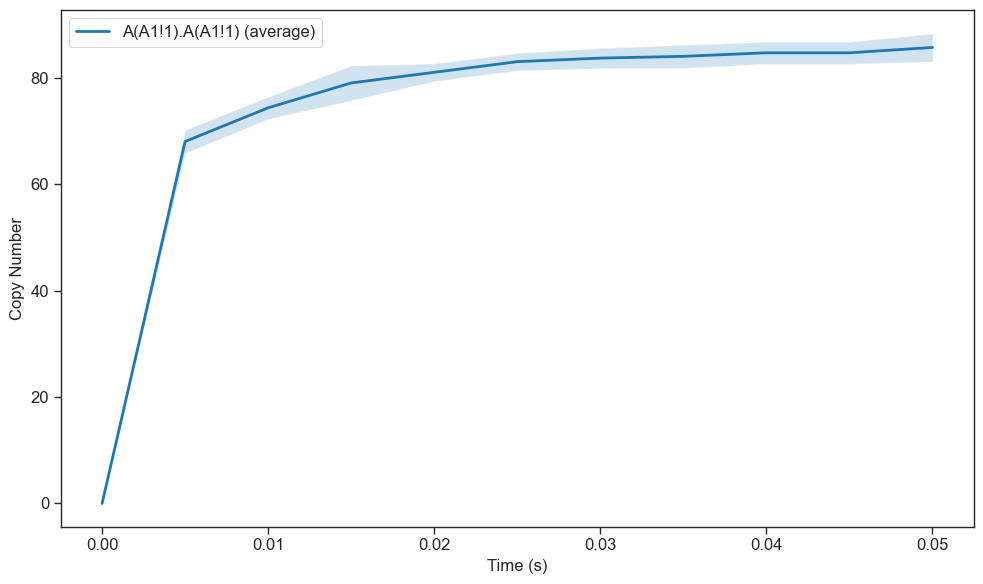

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


In [5]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='species',
                     legend=[['A(A1!1).A(A1!1)'],],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: species
- z-axis: None
- Simulations: 3 selected
- Legend: [['A(A1!1).A(A1!1)']]
- Display mode: individuals
Processed data for A(A1!1).A(A1!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/A(A1!1).A(A1!1).csv
Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


/Users/sikao/Documents/GitHub/ionerdss/ionerdss/nerdss_analysis/plot_figures.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


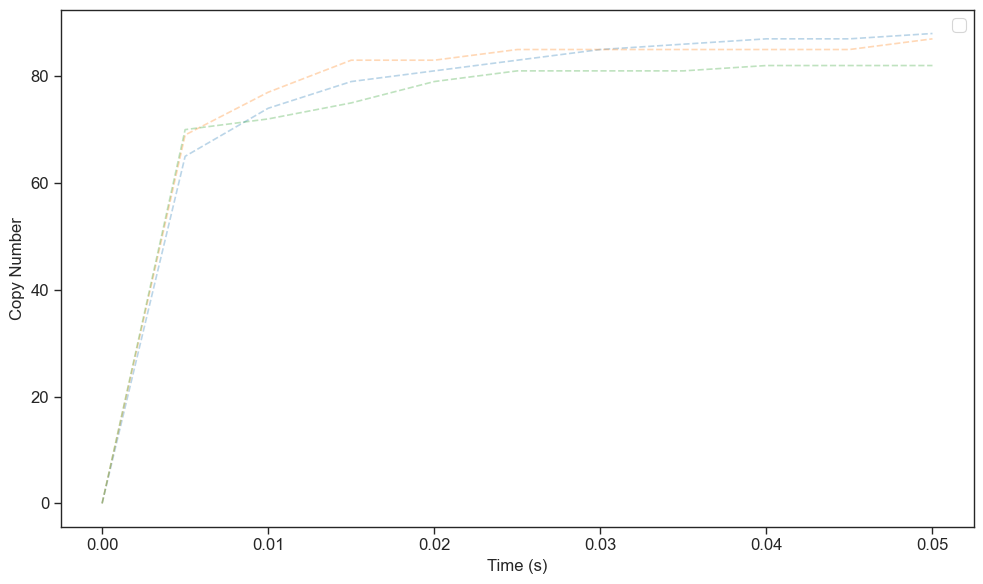

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


In [7]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='species',
                     legend=[['A(A1!1).A(A1!1)'],],
                     show_type='individuals')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: species
- z-axis: None
- Simulations: 3 selected
- Legend: [['A(A1!1).A(A1!1)'], ['A(A1!1).A(A1!1)', 'A(A2!1).A(A2!1)', 'A(A3!1).A(A3!1)']]
- Display mode: average
Processed data for A(A1!1).A(A1!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/A(A1!1).A(A1!1).csv
Processed data for A(A1!1).A(A1!1)+A(A2!1).A(A2!1)+A(A3!1).A(A3!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/A(A1!1).A(A1!1)_A(A2!1).A(A2!1)_A(A3!1).A(A3!1).csv
Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


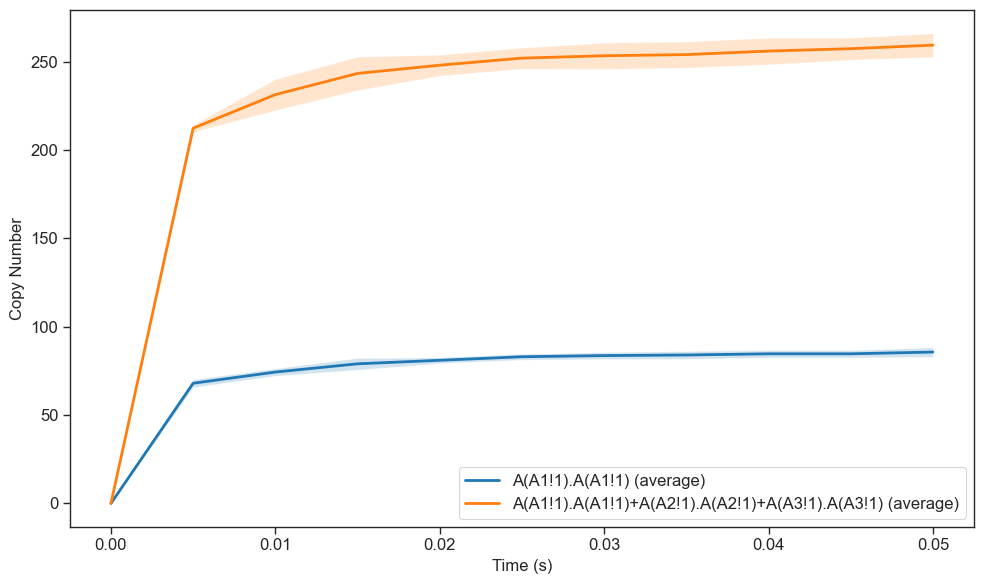

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


In [8]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='species',
                     legend=[['A(A1!1).A(A1!1)'], ['A(A1!1).A(A1!1)', 'A(A2!1).A(A2!1)', 'A(A3!1).A(A3!1)'],],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: maximum_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: average


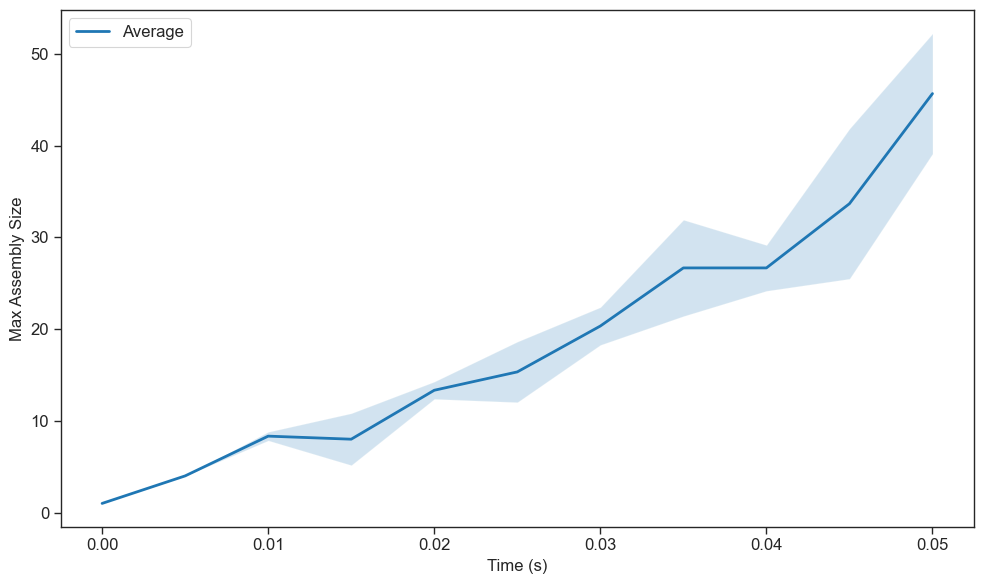

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.svg


In [3]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='maximum_assembly',
                     legend=['A',],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: maximum_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both


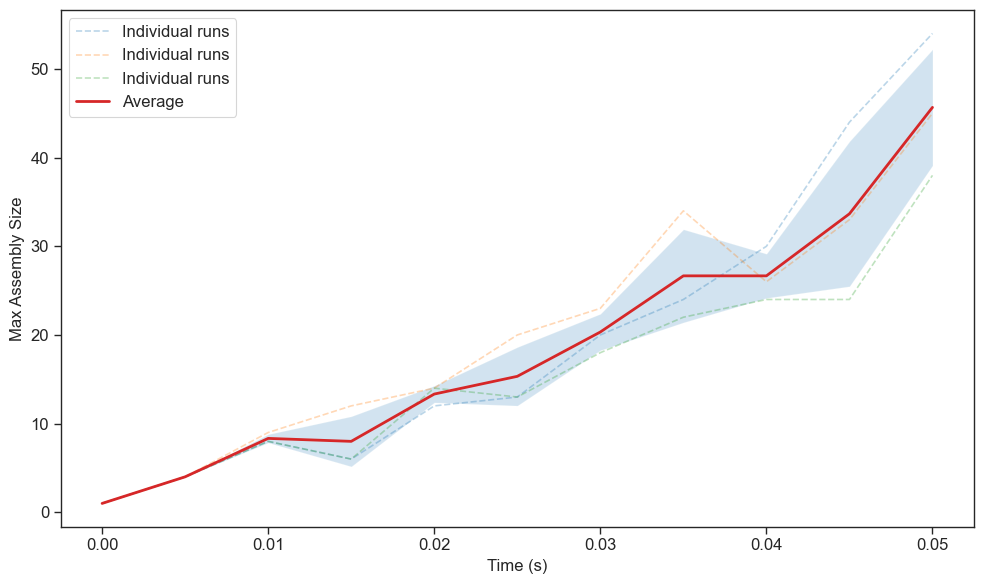

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.svg


In [4]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='maximum_assembly',
                     legend=['A',],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: average_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A>=2']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.csv


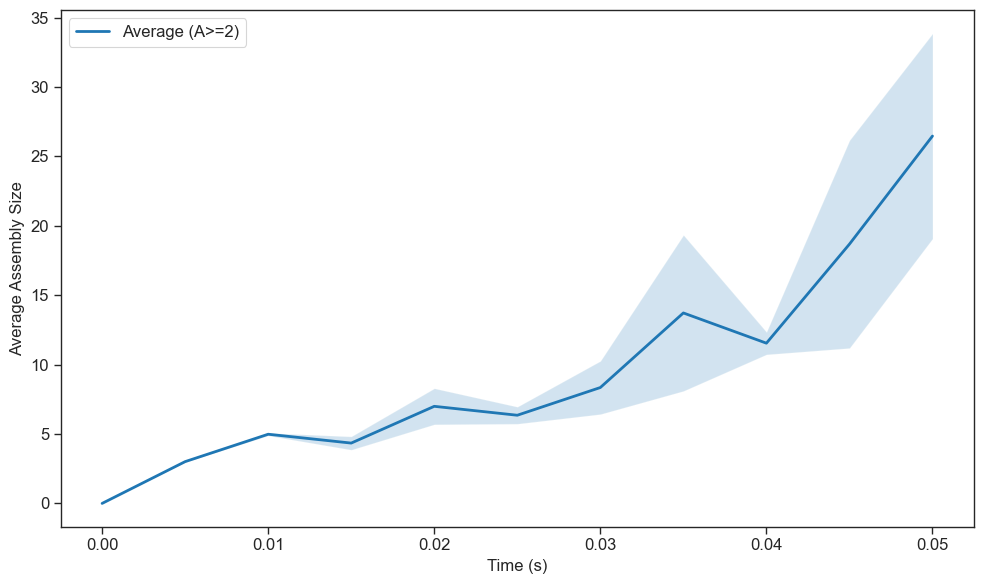

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.svg


In [6]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='average_assembly',
                     legend=['A>=2'],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: fraction_of_monomers_assembled
- z-axis: None
- Simulations: 3 selected
- Legend: ['A>=4']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/fraction_of_monomers_assembled_vs_time.csv


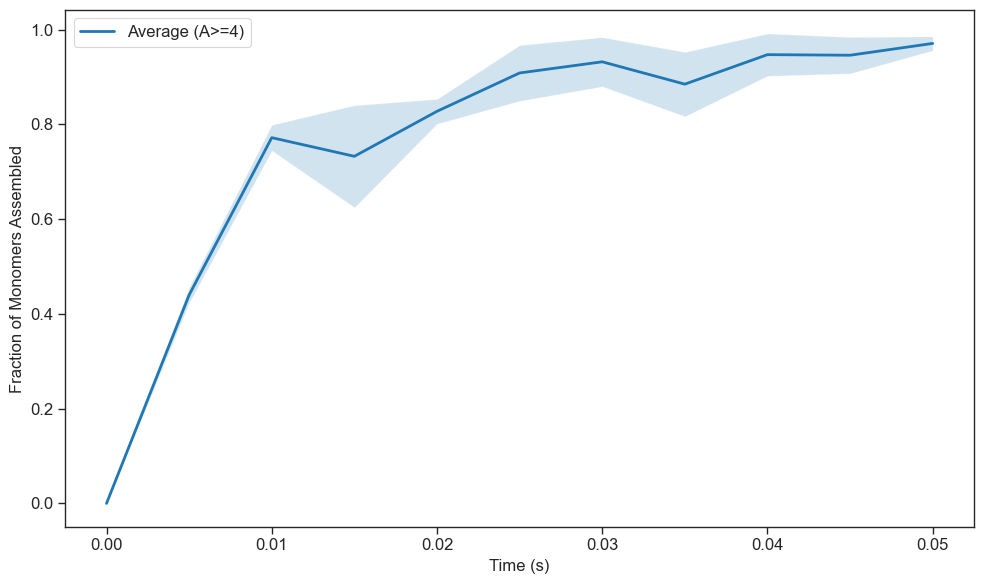

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/fraction_of_monomers_assembled_vs_time.svg


In [3]:
analysis.plot_figure(figure_type='line',
                     x='time',
                     y='fraction_of_monomers_assembled',
                     legend=['A>=4'],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: complex_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Bin edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Bin centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.csv


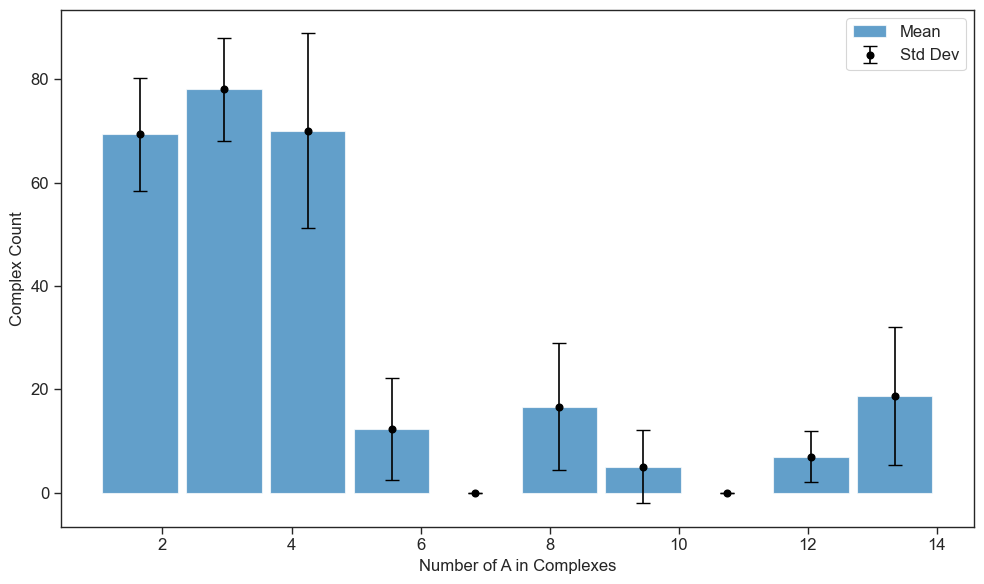

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.svg


In [7]:
analysis.plot_figure(figure_type='hist', x='size', y='complex_count', legend=['A'], bins=10, frequency=False, normalize=False)

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: monomer_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size.csv


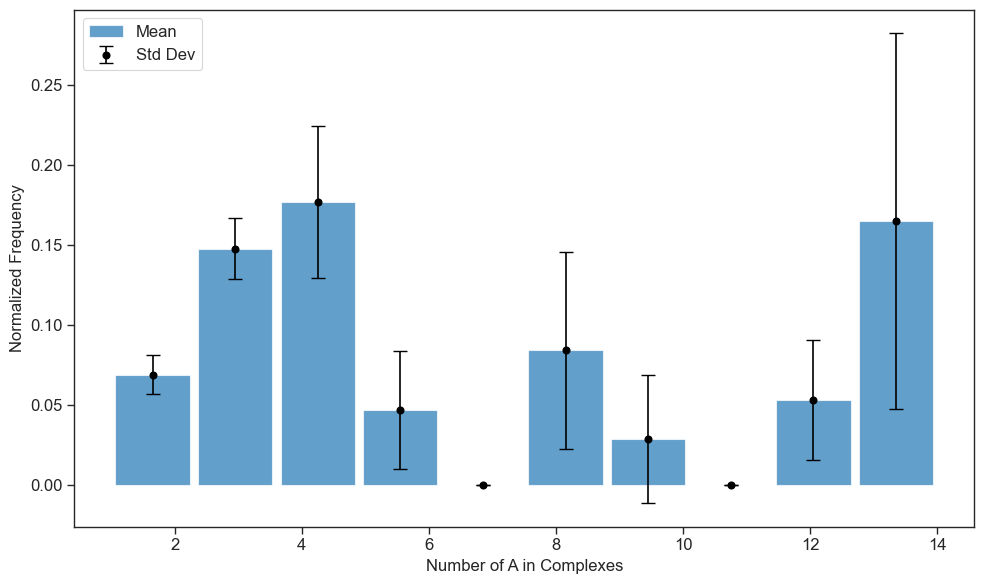

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size.svg


In [13]:
analysis.plot_figure(figure_type='hist', x='size', y='monomer_count', legend=['A'], bins=10, frequency=True, normalize=True)

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: complex_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Bin edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Bin centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.csv


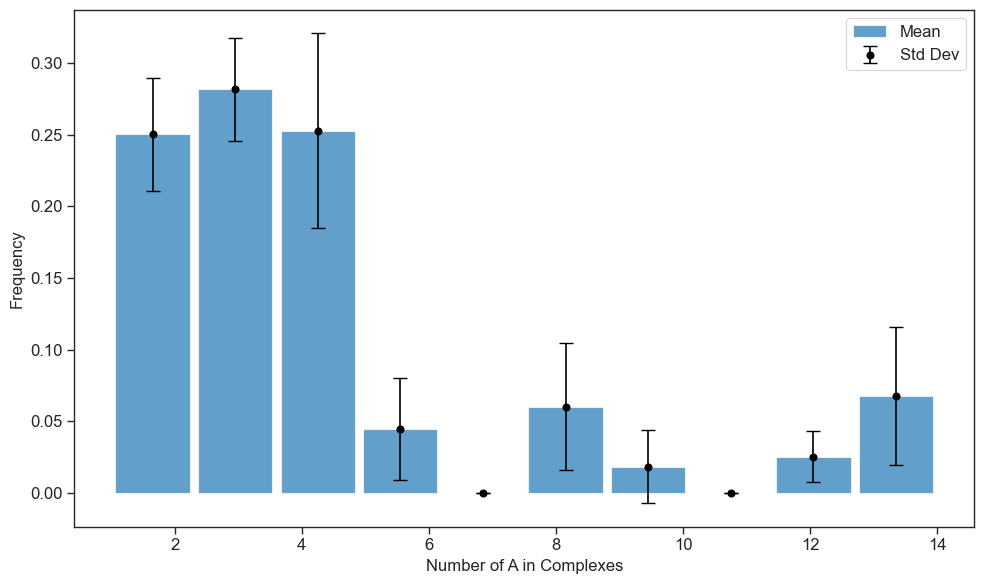

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.svg


In [4]:
analysis.plot_figure(figure_type='hist', x='size', y='complex_count', legend=['A'], bins=10, frequency=True, normalize=False)

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: complex_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Bin edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Bin centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.csv


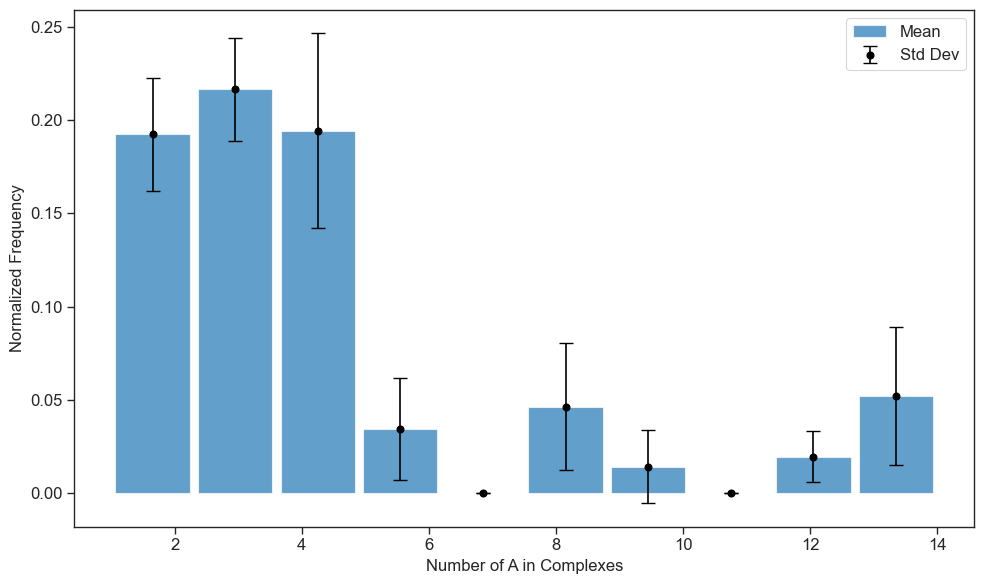

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.svg


In [5]:
analysis.plot_figure(figure_type='hist', x='size', y='complex_count', legend=['A'], bins=10, frequency=True, normalize=True)

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Time edges: [0.    0.004 0.008 0.012 0.016 0.02 ]
Time centers: [0.002 0.006 0.01  0.014 0.018]
Size edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Size centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]


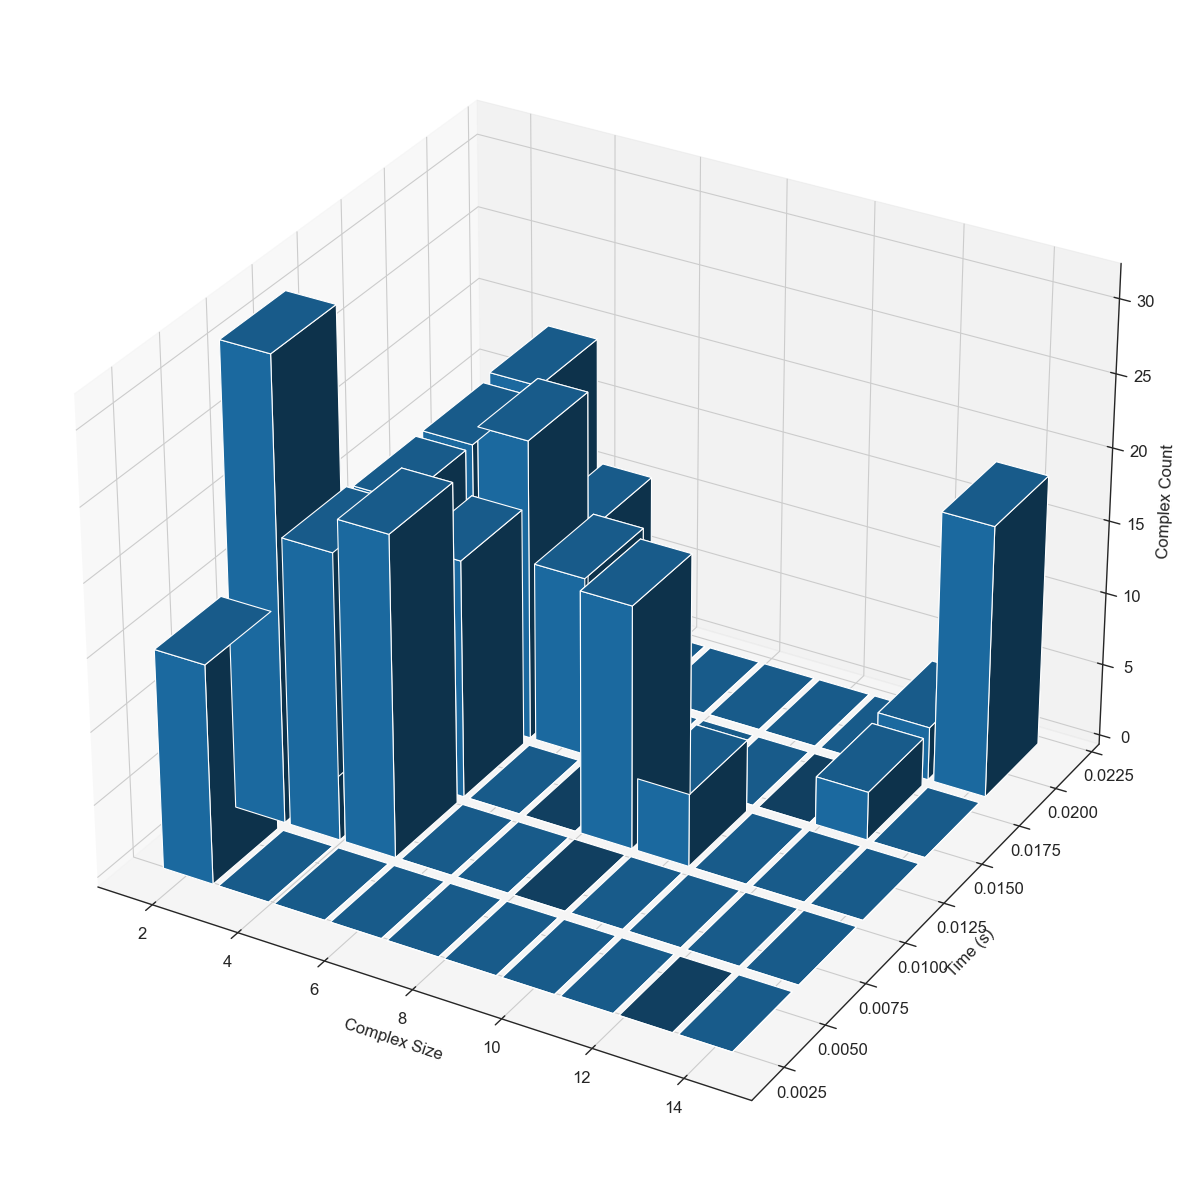

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/3D_hist_complex_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_complex_species_size_3d.csv


In [3]:
analysis.plot_figure(figure_type='3dhist', x='size', y='time', z='complex_count', legend=['A'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting heatmap with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Heatmap data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/heatmap_complex_species_size.csv


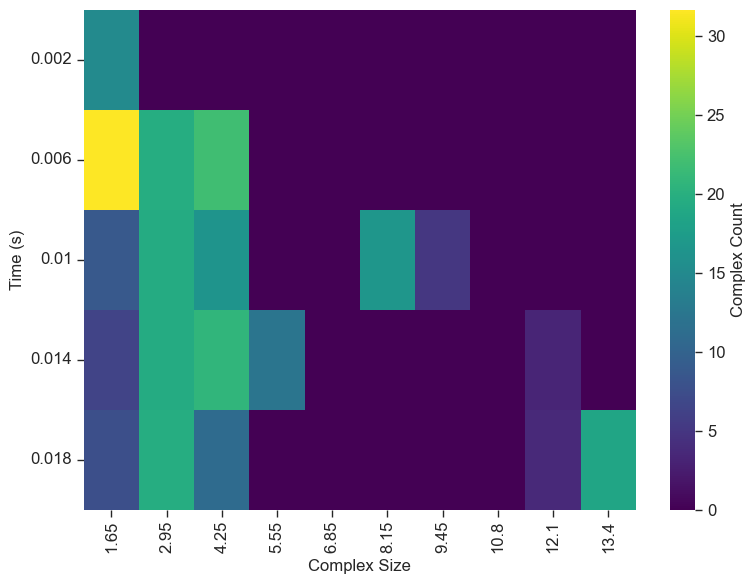

Heatmap plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/heatmap_complex_species_size.svg


In [4]:
analysis.plot_figure(figure_type='heatmap', x='size', y='time', z='complex_count', legend=['A'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Time edges: [0.    0.004 0.008 0.012 0.016 0.02 ]
Time centers: [0.002 0.006 0.01  0.014 0.018]
Size edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Size centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]


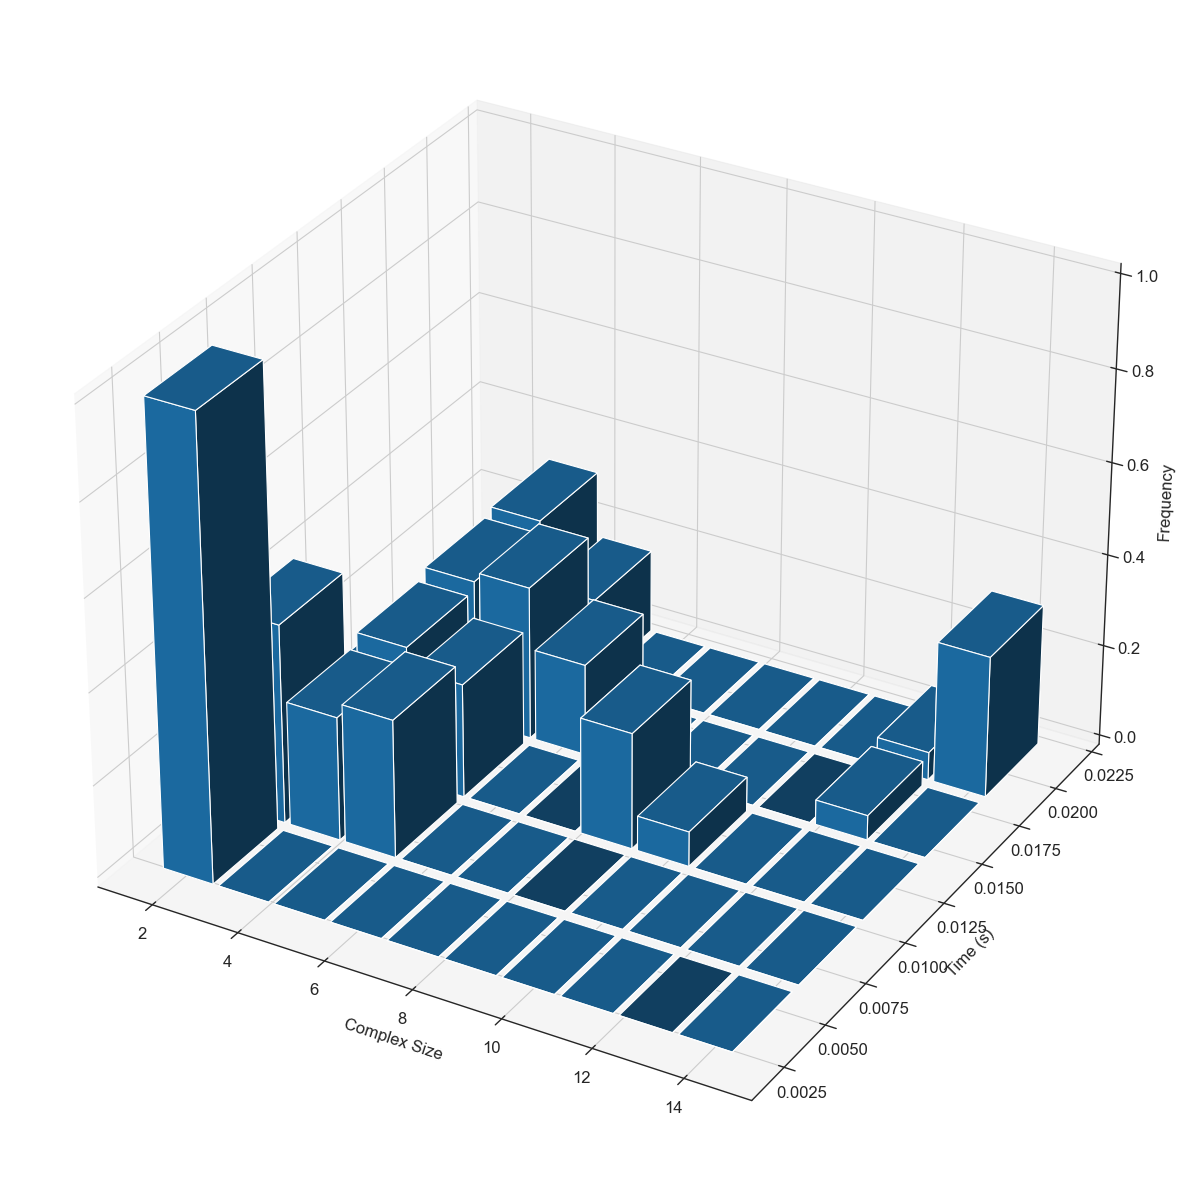

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/3D_hist_complex_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_complex_species_size_3d.csv


In [4]:
analysis.plot_figure(figure_type='3dhist', x='size', y='time', z='complex_count', legend=['A'], bins=10, time_bins=5, frequency=True, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Time edges: [0.    0.004 0.008 0.012 0.016 0.02 ]
Time centers: [0.002 0.006 0.01  0.014 0.018]
Size edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Size centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]


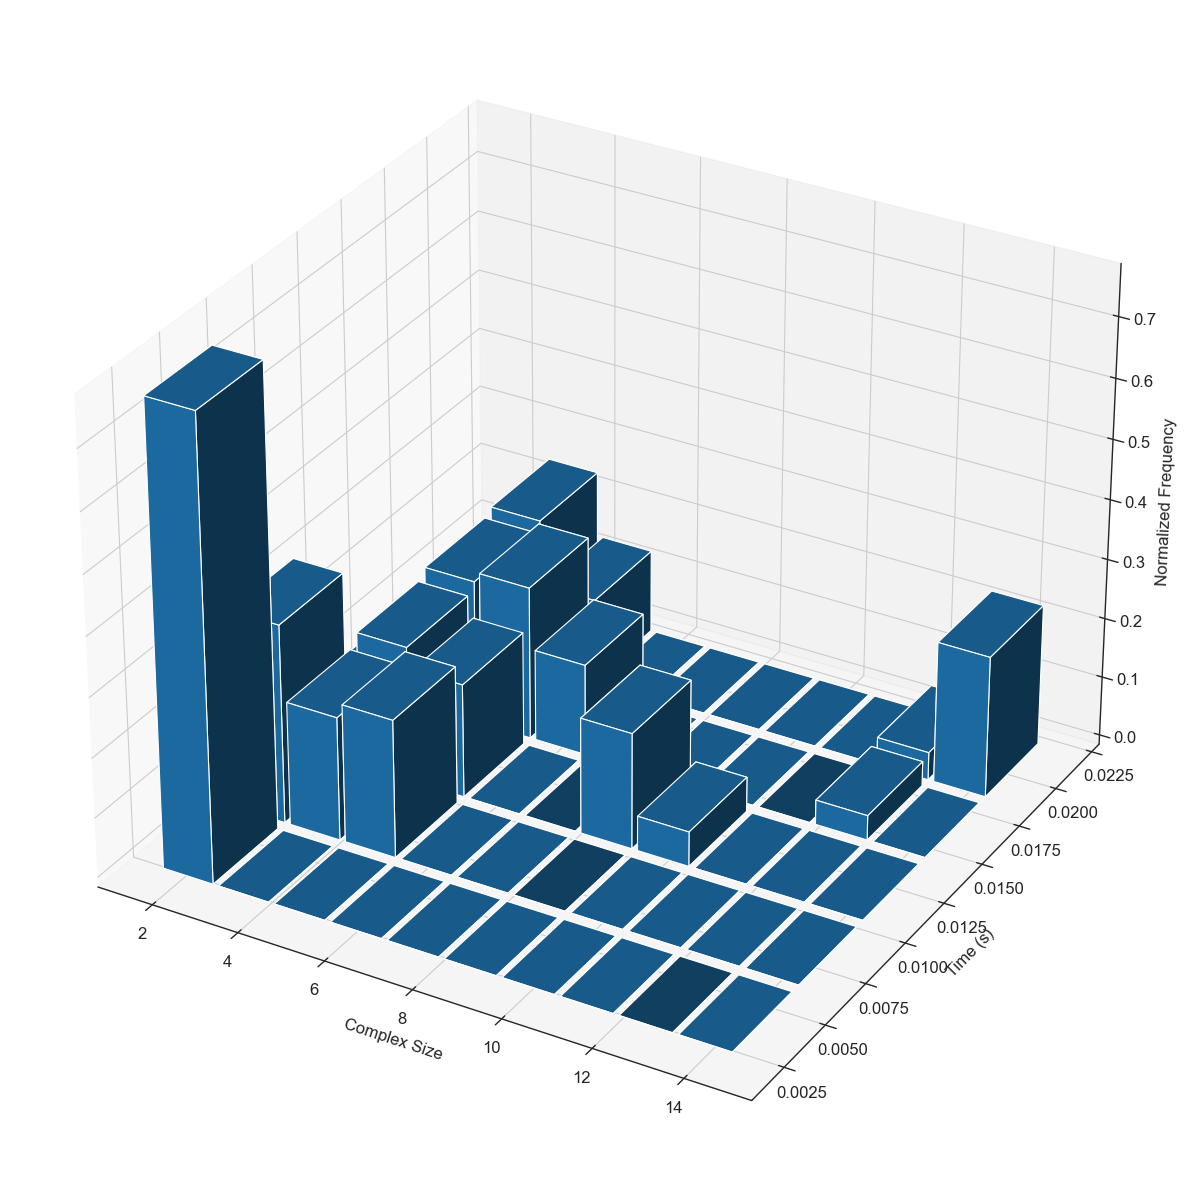

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/3D_hist_complex_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_complex_species_size_3d.csv


In [5]:
analysis.plot_figure(figure_type='3dhist', x='size', y='time', z='complex_count', legend=['A'], bins=10, time_bins=5, frequency=True, normalize=True, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Time edges: [0.         0.00666667 0.01333333 0.02      ]
Time centers: [0.00333333 0.01       0.01666667]
Size edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Size centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]


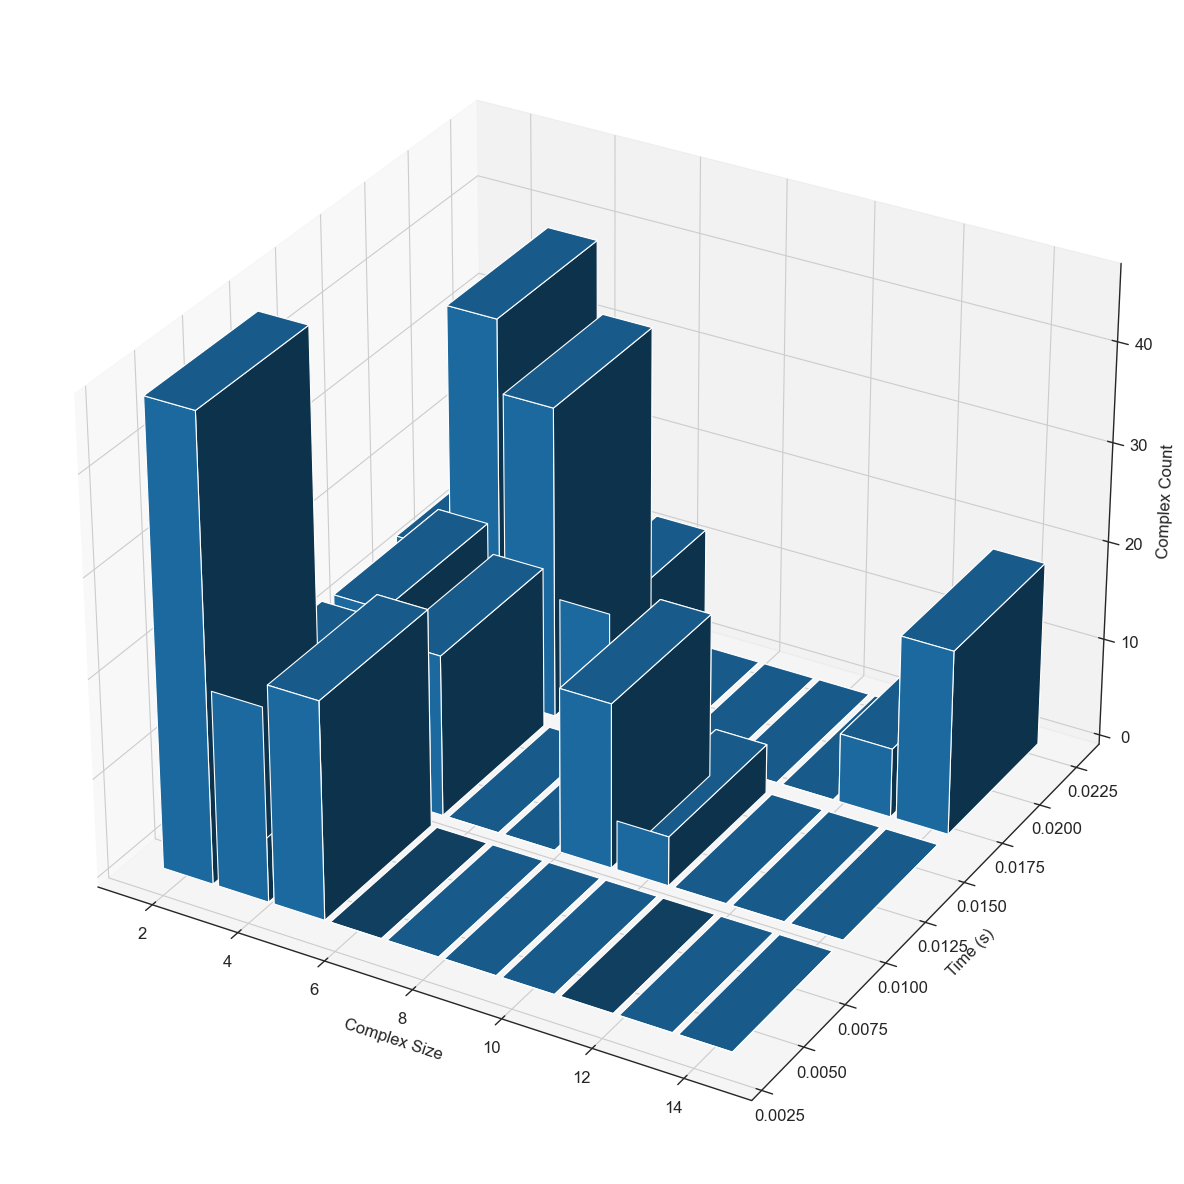

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/3D_hist_complex_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_complex_species_size_3d.csv


In [6]:
analysis.plot_figure(figure_type='3dhist', x='size', y='time', z='complex_count', legend=['A'], bins=10, time_bins=3, frequency=False, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: monomer_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Time edges: [0.    0.004 0.008 0.012 0.016 0.02 ]
Time centers: [0.002 0.006 0.01  0.014 0.018]
Size edges: [ 1.   2.3  3.6  4.9  6.2  7.5  8.8 10.1 11.4 12.7 14. ]
Size centers: [ 1.65  2.95  4.25  5.55  6.85  8.15  9.45 10.75 12.05 13.35]


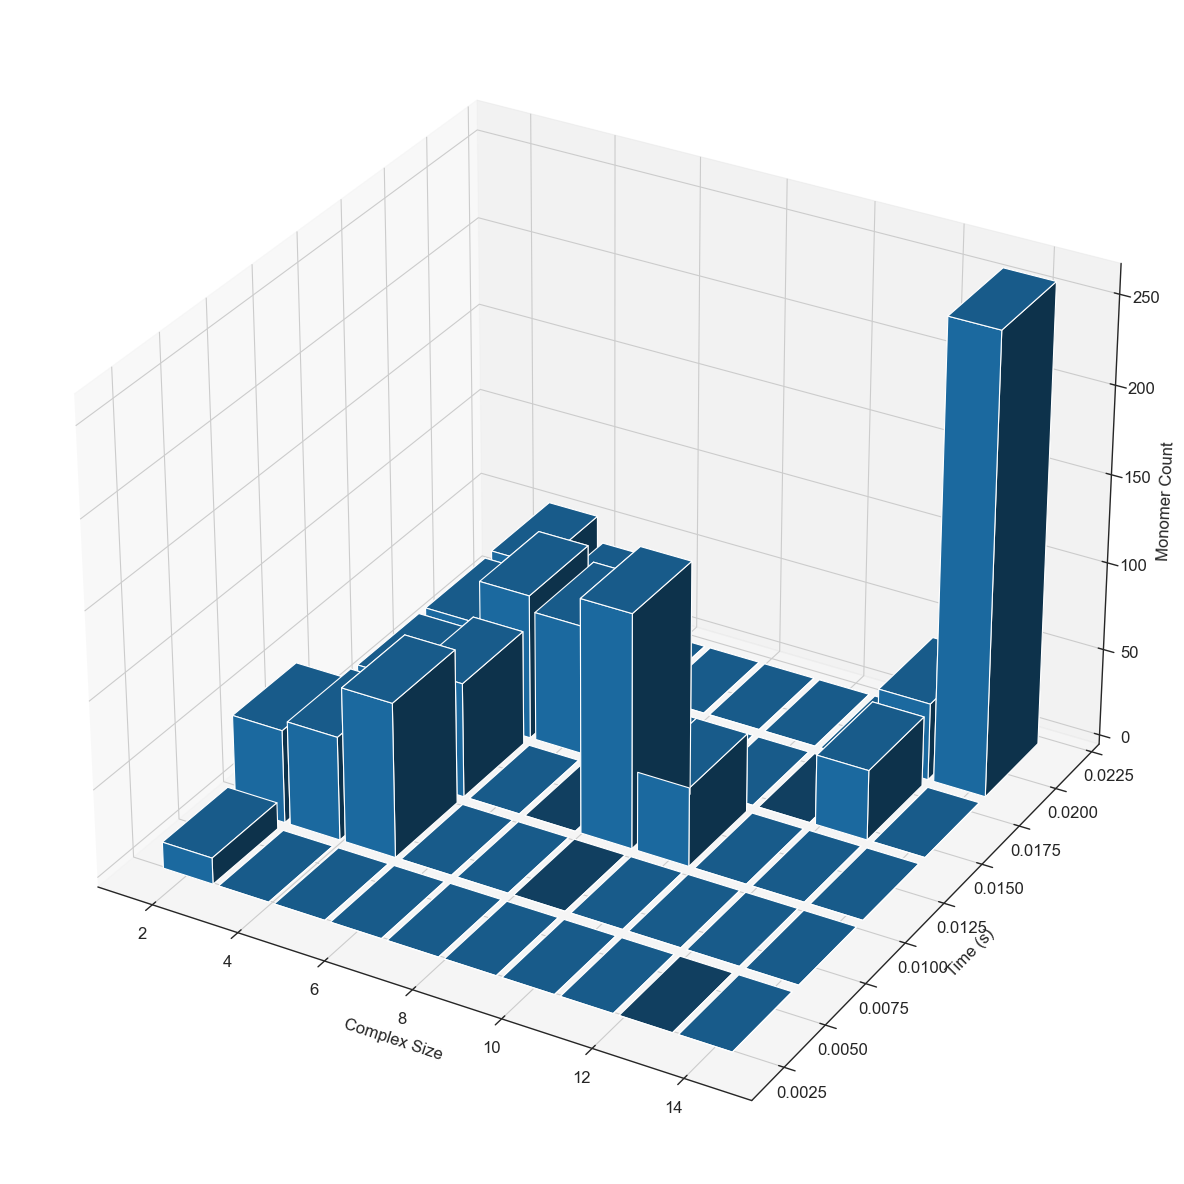

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/3D_hist_monomer_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size_3d.csv


In [3]:
analysis.plot_figure(figure_type='3dhist', x='size', y='time', z='monomer_count', legend=['A'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting heatmap with:
- x-axis: size
- y-axis: time
- z-axis: monomer_count
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Heatmap data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/heatmap_monomer_counts_vs_complex_size.csv


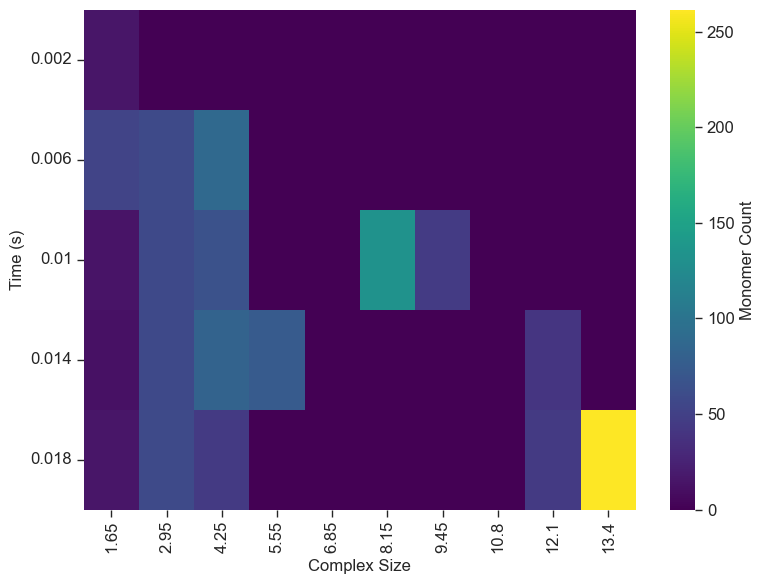

Heatmap plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/heatmap_monomer_counts_vs_complex_size.svg


In [4]:
analysis.plot_figure(figure_type='heatmap', x='size', y='time', z='monomer_count', legend=['A'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: size
- y-axis: free_energy
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/free_energy_vs_size.csv


/Users/sikao/Documents/GitHub/ionerdss/ionerdss/nerdss_analysis/plot_figures.py:1701: RuntimeWarning: Mean of empty slice
  avg_free_energy = np.nanmean(free_energy_array, axis=0)
/Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


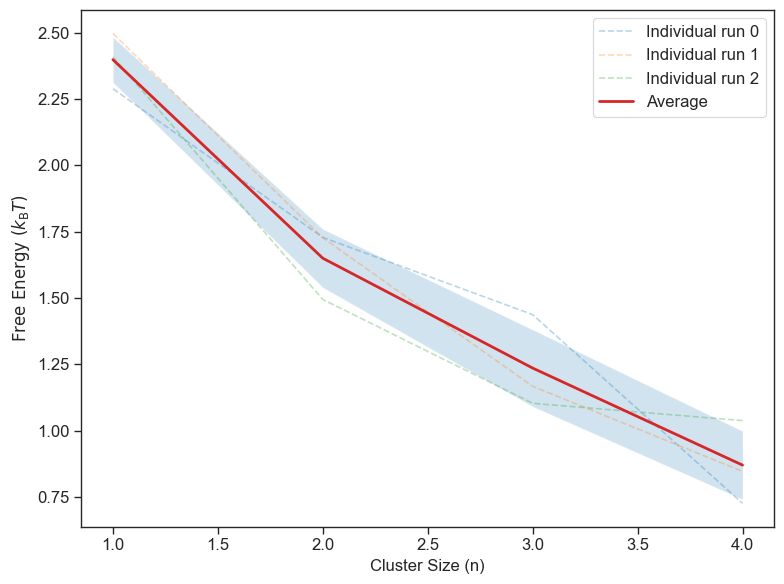

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/free_energy_vs_size.svg


In [3]:
analysis.plot_figure(figure_type='line', x='size', y='free_energy', legend=['A'], figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: size
- y-axis: symmetric_association_probability
- z-axis: None
- Simulations: 3 selected
- Legend: ['associate size > 2', 'associate size = 2', 'associate size < 2']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/symmetric_association_probability.csv


/Users/sikao/Documents/GitHub/ionerdss/ionerdss/nerdss_analysis/plot_figures.py:1679: RuntimeWarning: Mean of empty slice
  avg_probs = np.nanmean(prob_array, axis=0)
/Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


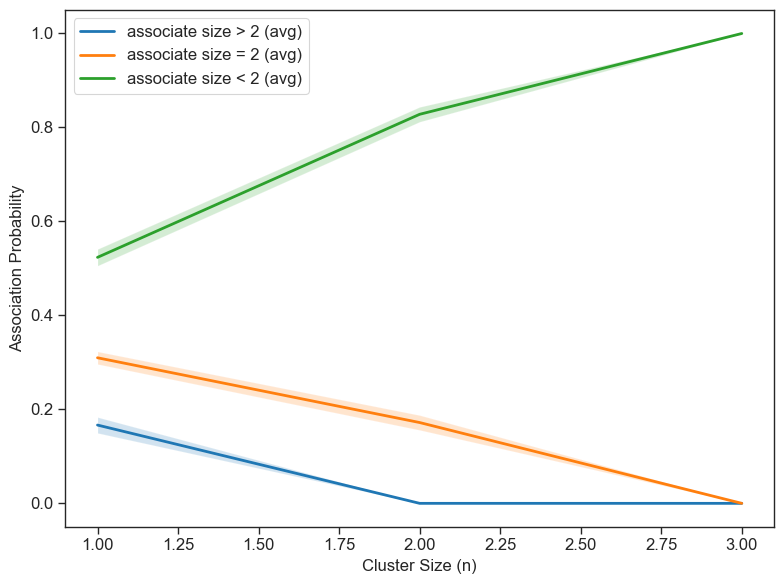

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/symmetric_association_probability.svg


In [3]:
analysis.plot_figure(figure_type='line', x='size', y='symmetric_association_probability', legend=["associate size > 2", "associate size = 2", "associate size < 2"], show_type='average', figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: size
- y-axis: asymmetric_association_probability
- z-axis: None
- Simulations: 3 selected
- Legend: ['associate size > 2', 'associate size = 2', 'associate size < 2']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/asymmetric_association_probability.csv


/Users/sikao/Documents/GitHub/ionerdss/ionerdss/nerdss_analysis/plot_figures.py:1798: RuntimeWarning: Mean of empty slice
  avg_probs = np.nanmean(prob_array, axis=0)
/Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


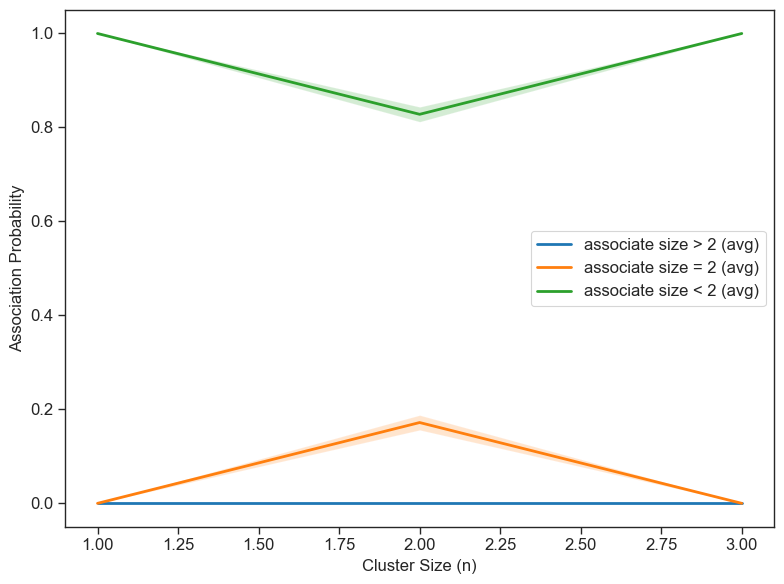

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/asymmetric_association_probability.svg


In [3]:
analysis.plot_figure(figure_type='line', x='size', y='asymmetric_association_probability', legend=["associate size > 2", "associate size = 2", "associate size < 2"], show_type='average', figure_size=(8, 6))

In [ ]:
# following lines are commented out because this test dataset does not have enough dissociation events
# analysis.plot_figure(figure_type='line', x='size', y='symmetric_dissociation_probability', legend=["dissociate size > 2", "dissociate size = 2", "dissociate size < 2"], show_type='average', figure_size=(8, 6))
# analysis.plot_figure(figure_type='line', x='size', y='asymmetric_dissociation_probability', legend=["dissociate size > 2", "dissociate size = 2", "dissociate size < 2"], show_type='average', figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: size
- y-axis: growth_probability
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/growth_probability.csv


/Users/sikao/Documents/GitHub/ionerdss/ionerdss/nerdss_analysis/plot_figures.py:2147: RuntimeWarning: Mean of empty slice
  avg_probs = np.nanmean(prob_array, axis=0)
/Users/sikao/anaconda3/envs/local_nerdss/lib/python3.9/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


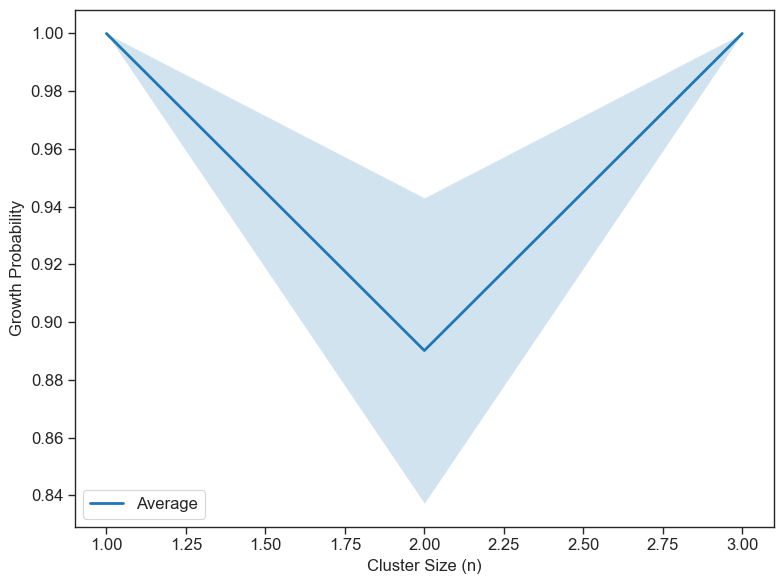

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/growth_probability.svg


In [3]:
analysis.plot_figure(figure_type='line', x='size', y='growth_probability', legend=["A"], show_type='average', figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: size
- y-axis: lifetime
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/lifetime_vs_size.csv


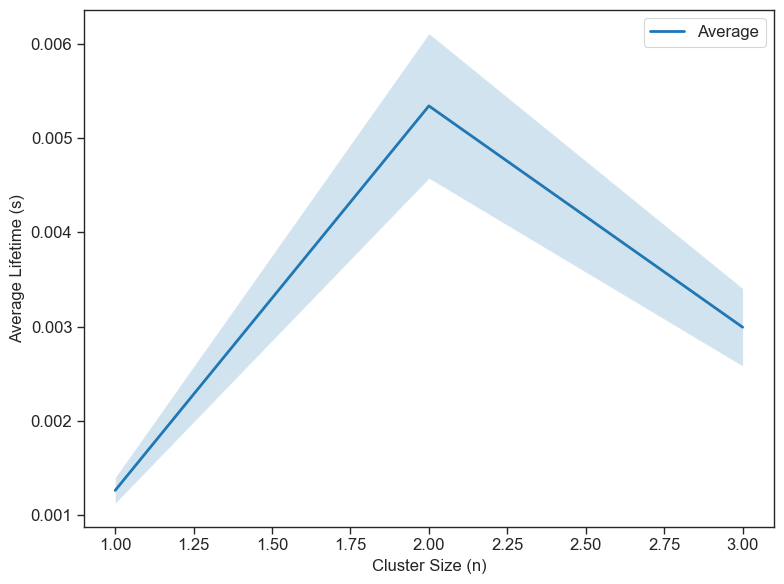

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8y7s_dir/nerdss_output/figure_plot_data/lifetime_vs_size.svg


In [3]:
analysis.plot_figure(figure_type='line', x='size', y='lifetime', legend=["A"], show_type='average', figure_size=(8, 6))

In [2]:
analysis_8erq = ion.Analysis("./data/8erq_dir/nerdss_output/")

Detected a batch of 3 simulation directories.


No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: species
- z-axis: None
- Simulations: 3 selected
- Legend: [['C(A1!1).A(C1!1)']]
- Display mode: average
Processed data for C(A1!1).A(C1!1) saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/C(A1!1).A(C1!1).csv
Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


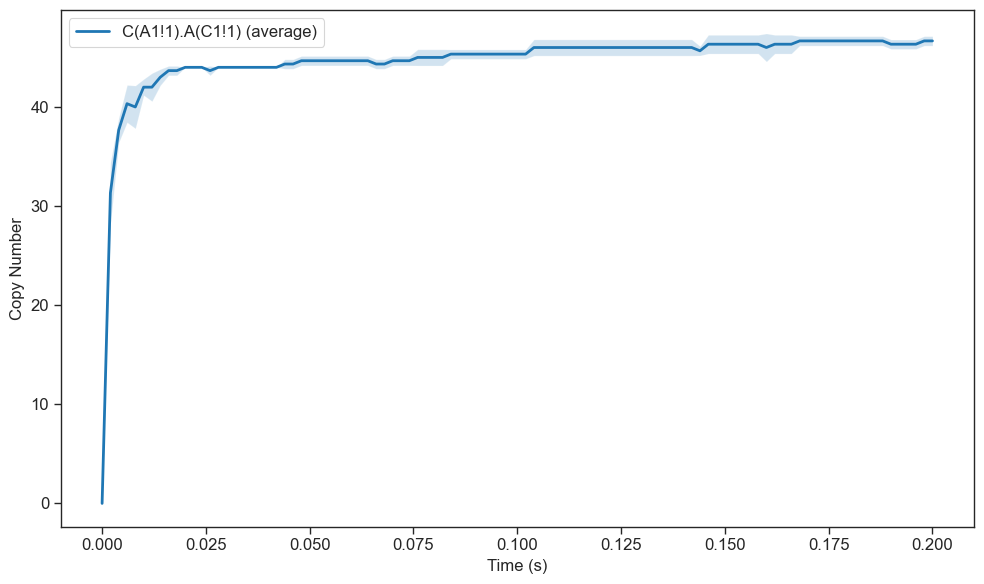

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/species_vs_time_plot.svg


In [11]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='species',
                     legend=[['C(A1!1).A(C1!1)'],],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: maximum_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.csv


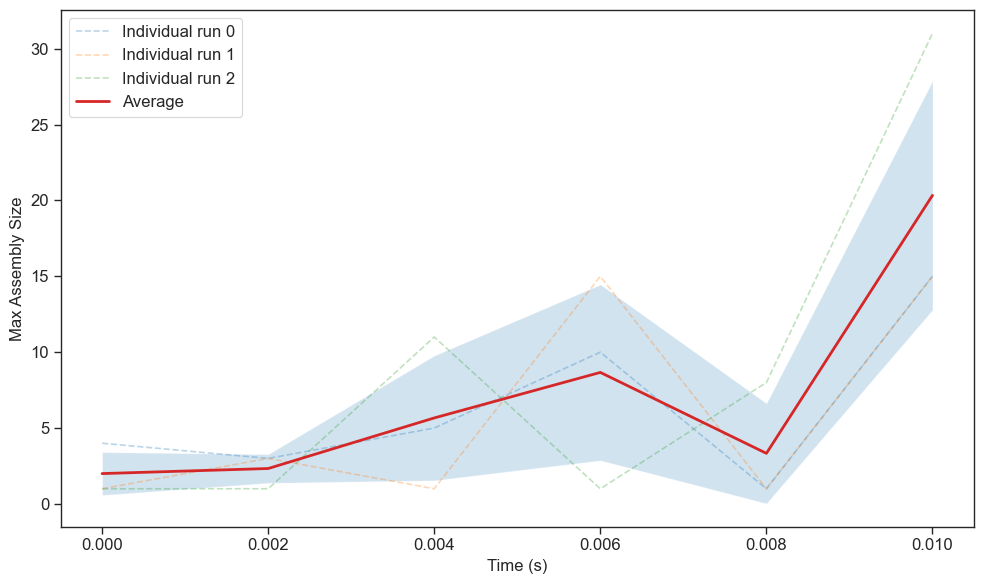

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.svg


In [3]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='maximum_assembly',
                     legend=['A',],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: maximum_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['B']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.csv


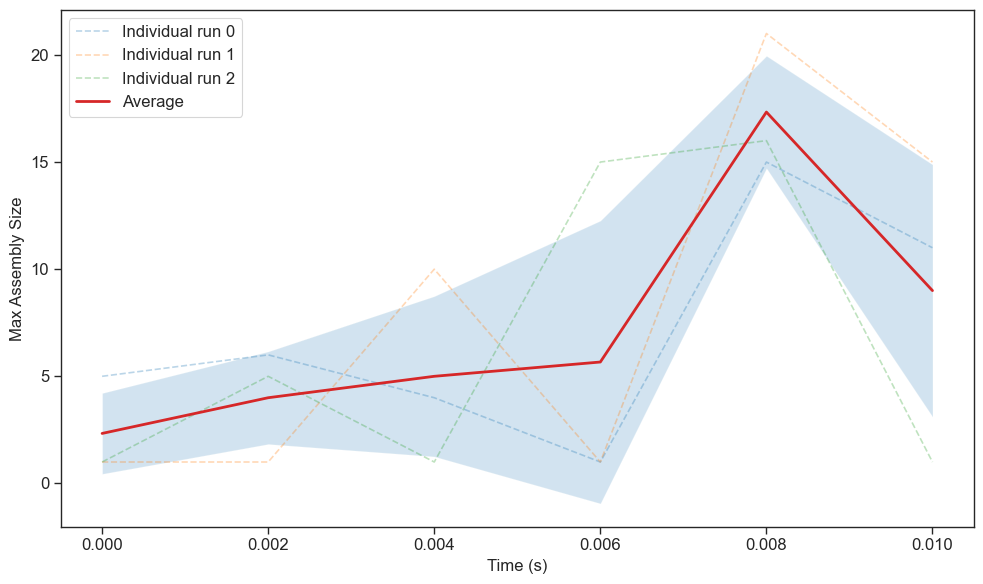

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.svg


In [4]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='maximum_assembly',
                     legend=['B',],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: maximum_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A', 'B']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.csv


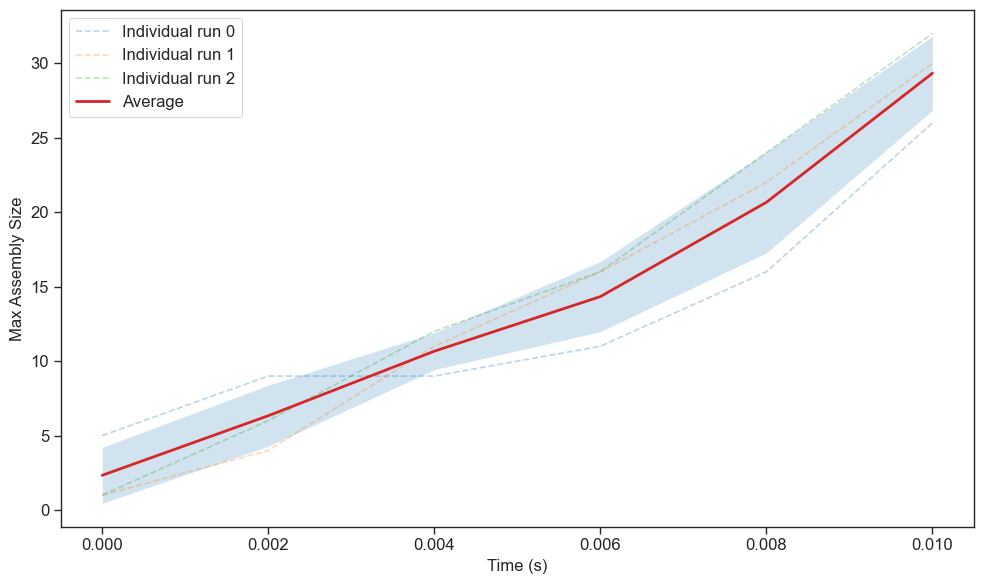

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/max_assembly_size_vs_time.svg


In [6]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='maximum_assembly',
                     legend=['A', 'B'],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: average_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A>=1, B>=2']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.csv


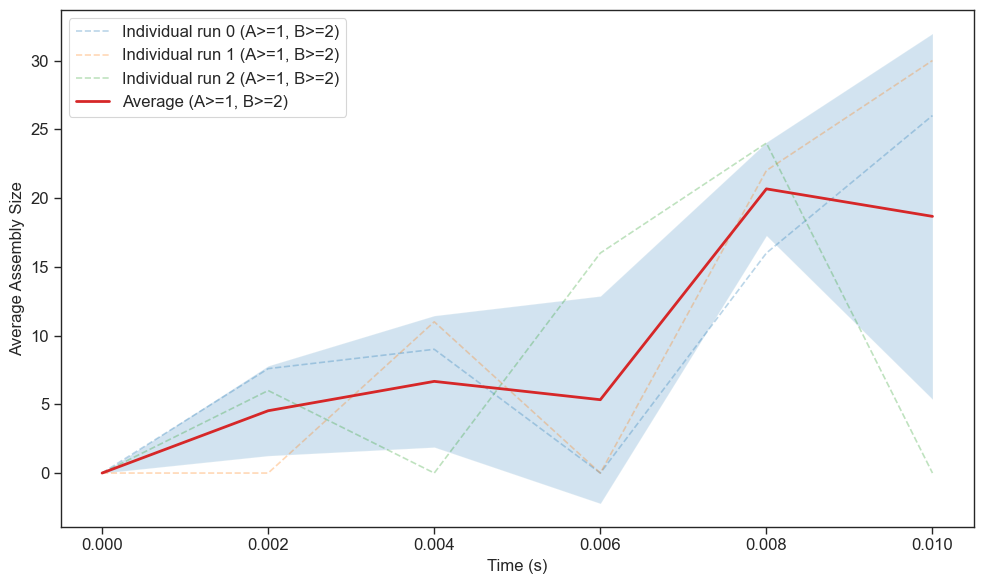

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.svg


In [3]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='average_assembly',
                     legend=['A>=1, B>=2'],
                     show_type='both')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: average_assembly
- z-axis: None
- Simulations: 3 selected
- Legend: ['A>=1', 'B>=1']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.csv


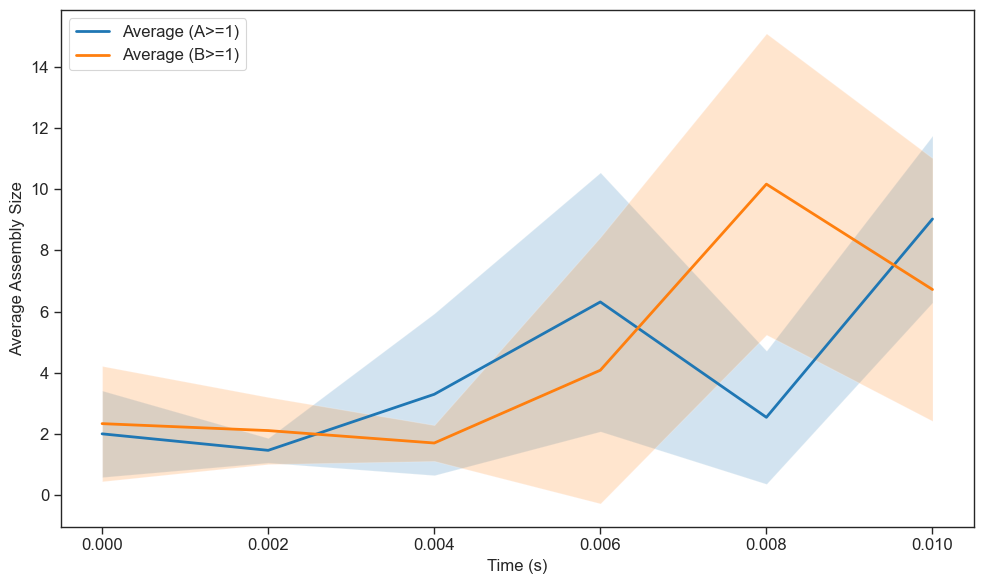

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/average_assembly_size_vs_time.svg


In [4]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='average_assembly',
                     legend=['A>=1', 'B>=1'],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting line with:
- x-axis: time
- y-axis: fraction_of_monomers_assembled
- z-axis: None
- Simulations: 3 selected
- Legend: ['B>=3']
- Display mode: average
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/fraction_of_monomers_assembled_vs_time.csv


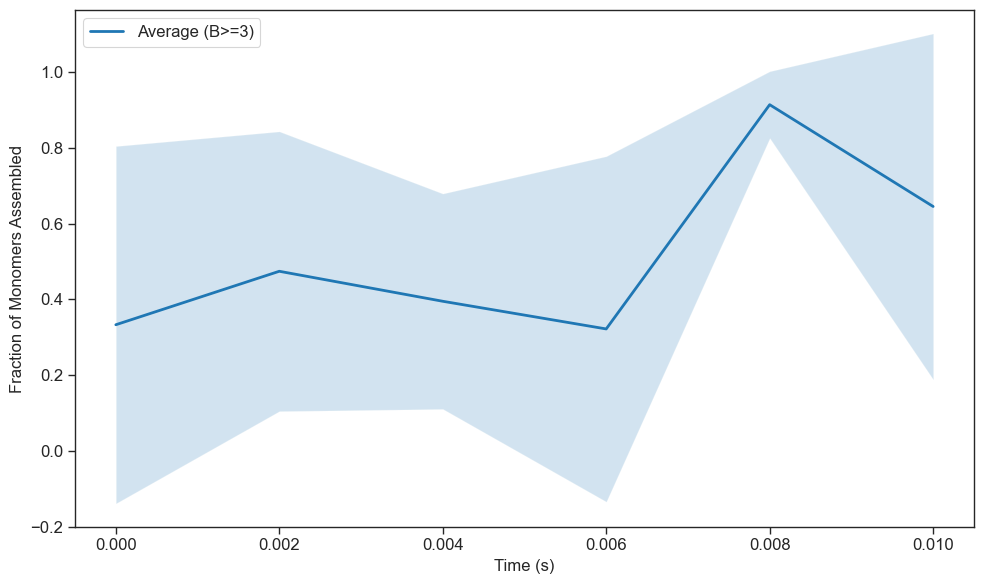

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/fraction_of_monomers_assembled_vs_time.svg


In [5]:
analysis_8erq.plot_figure(figure_type='line',
                     x='time',
                     y='fraction_of_monomers_assembled',
                     legend=['B>=3'],
                     show_type='average')

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: complex_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['B']
- Display mode: both
Bin edges: [ 0.   3.1  6.2  9.3 12.4 15.5 18.6 21.7 24.8 27.9 31. ]
Bin centers: [ 1.55  4.65  7.75 10.85 13.95 17.05 20.15 23.25 26.35 29.45]
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.csv


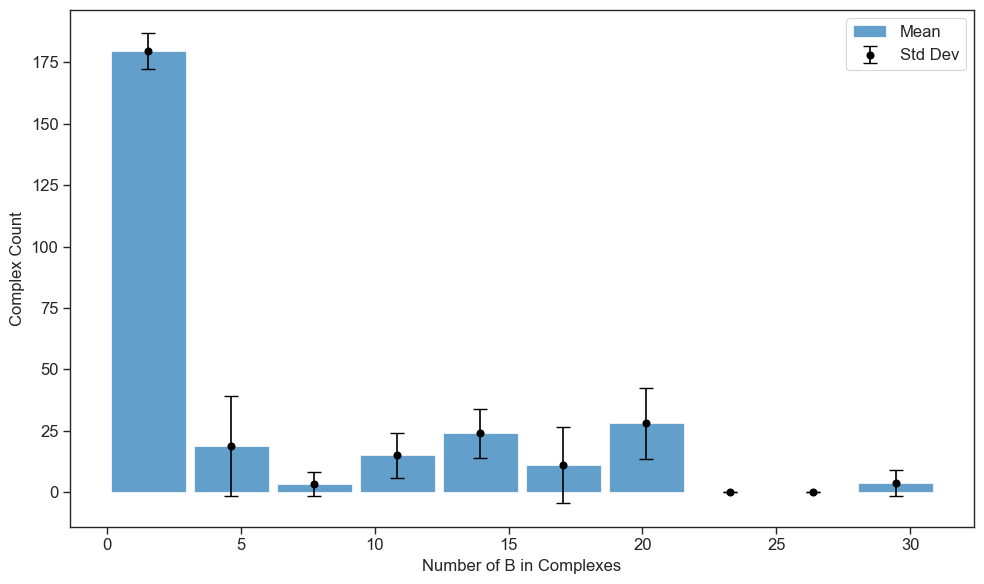

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_average_number_vs_size.svg


In [8]:
analysis_8erq.plot_figure(figure_type='hist', x='size', y='complex_count', legend=['B'], bins=10, frequency=False, normalize=False)

No simulations specified. Using all available simulations.
Plotting hist with:
- x-axis: size
- y-axis: monomer_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['B']
- Display mode: both
Processed data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size.csv


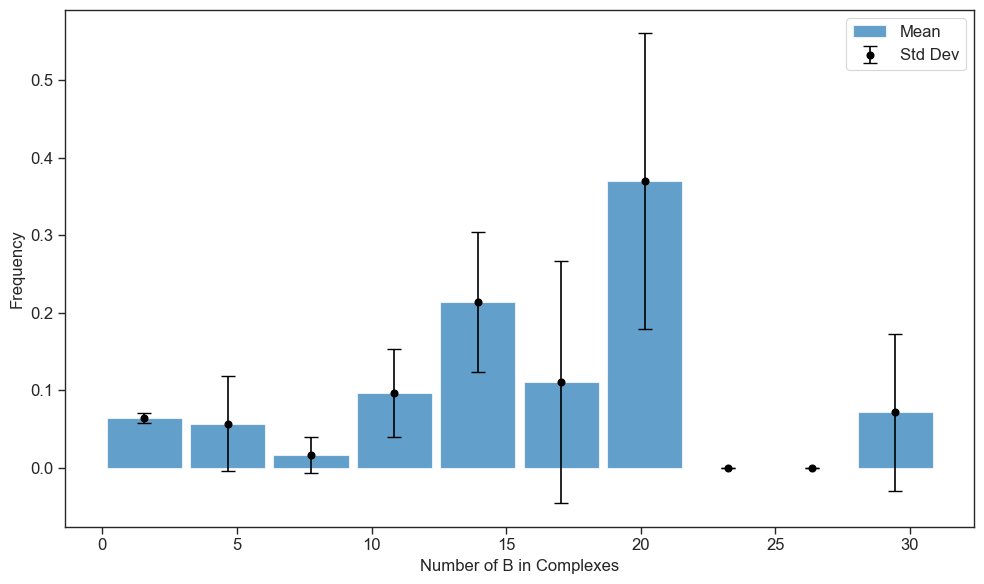

Plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size.svg


In [17]:
analysis_8erq.plot_figure(figure_type='hist', x='size', y='monomer_count', legend=['B'], bins=10, frequency=True, normalize=False)

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['B']
- Display mode: both
Time edges: [0.     0.0016 0.0032 0.0048 0.0064 0.008 ]
Time centers: [0.0008 0.0024 0.004  0.0056 0.0072]
Size edges: [ 0.   3.1  6.2  9.3 12.4 15.5 18.6 21.7 24.8 27.9 31. ]
Size centers: [ 1.55  4.65  7.75 10.85 13.95 17.05 20.15 23.25 26.35 29.45]


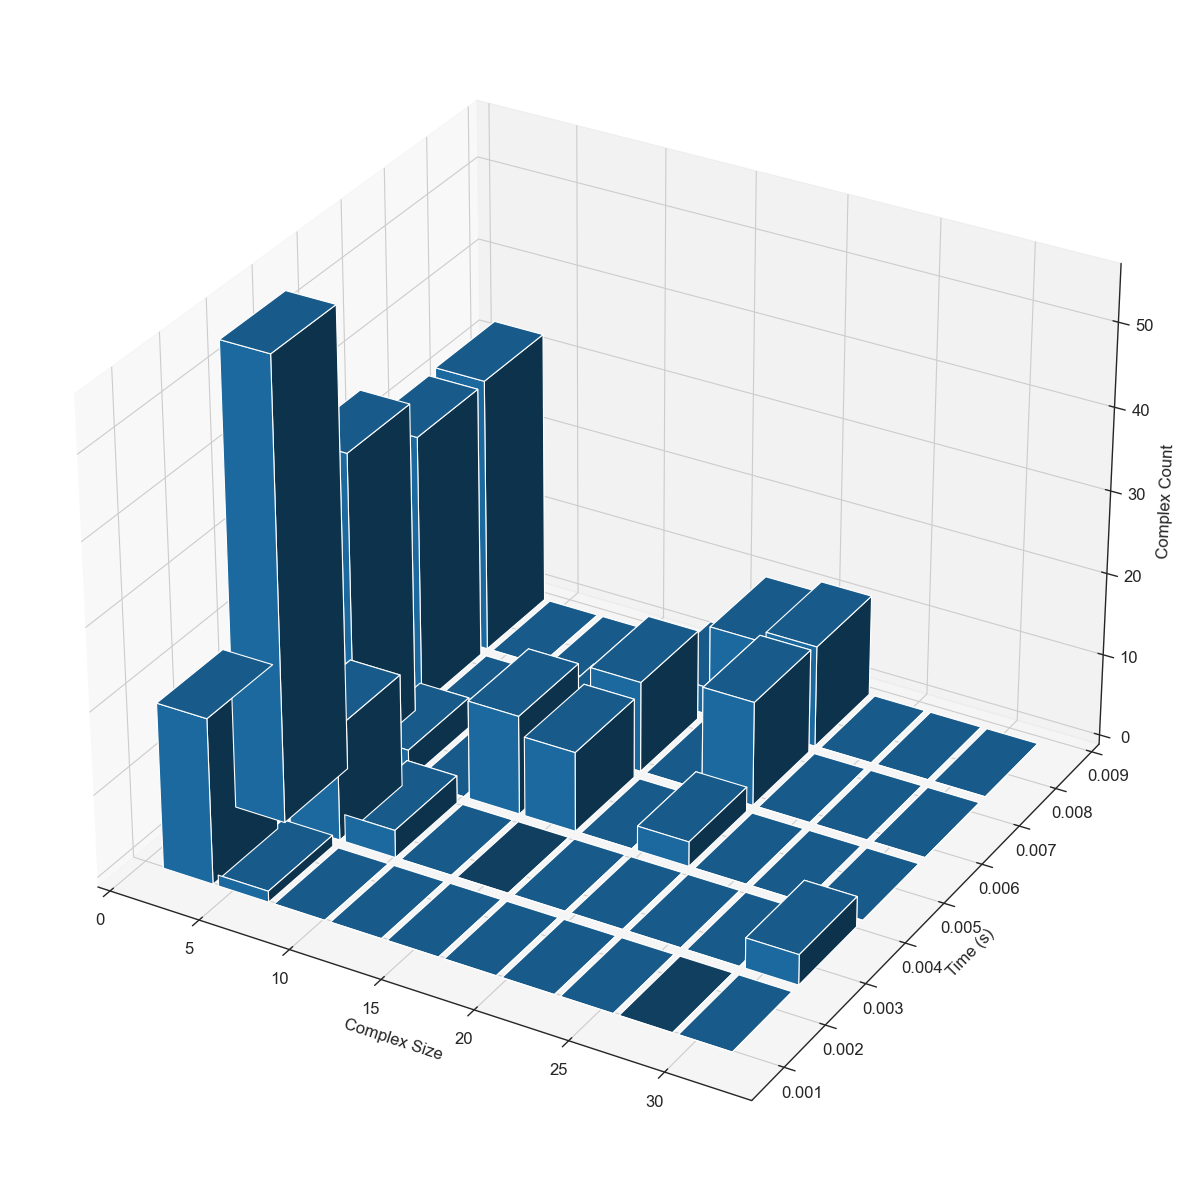

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/3D_hist_complex_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_complex_species_size_3d.csv


In [9]:
analysis_8erq.plot_figure(figure_type='3dhist', x='size', y='time', z='complex_count', legend=['B'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting 3dhist with:
- x-axis: size
- y-axis: time
- z-axis: monomer_count
- Simulations: 3 selected
- Legend: ['B']
- Display mode: both
Time edges: [0.     0.0016 0.0032 0.0048 0.0064 0.008 ]
Time centers: [0.0008 0.0024 0.004  0.0056 0.0072]
Size edges: [ 0.   3.1  6.2  9.3 12.4 15.5 18.6 21.7 24.8 27.9 31. ]
Size centers: [ 1.55  4.65  7.75 10.85 13.95 17.05 20.15 23.25 26.35 29.45]


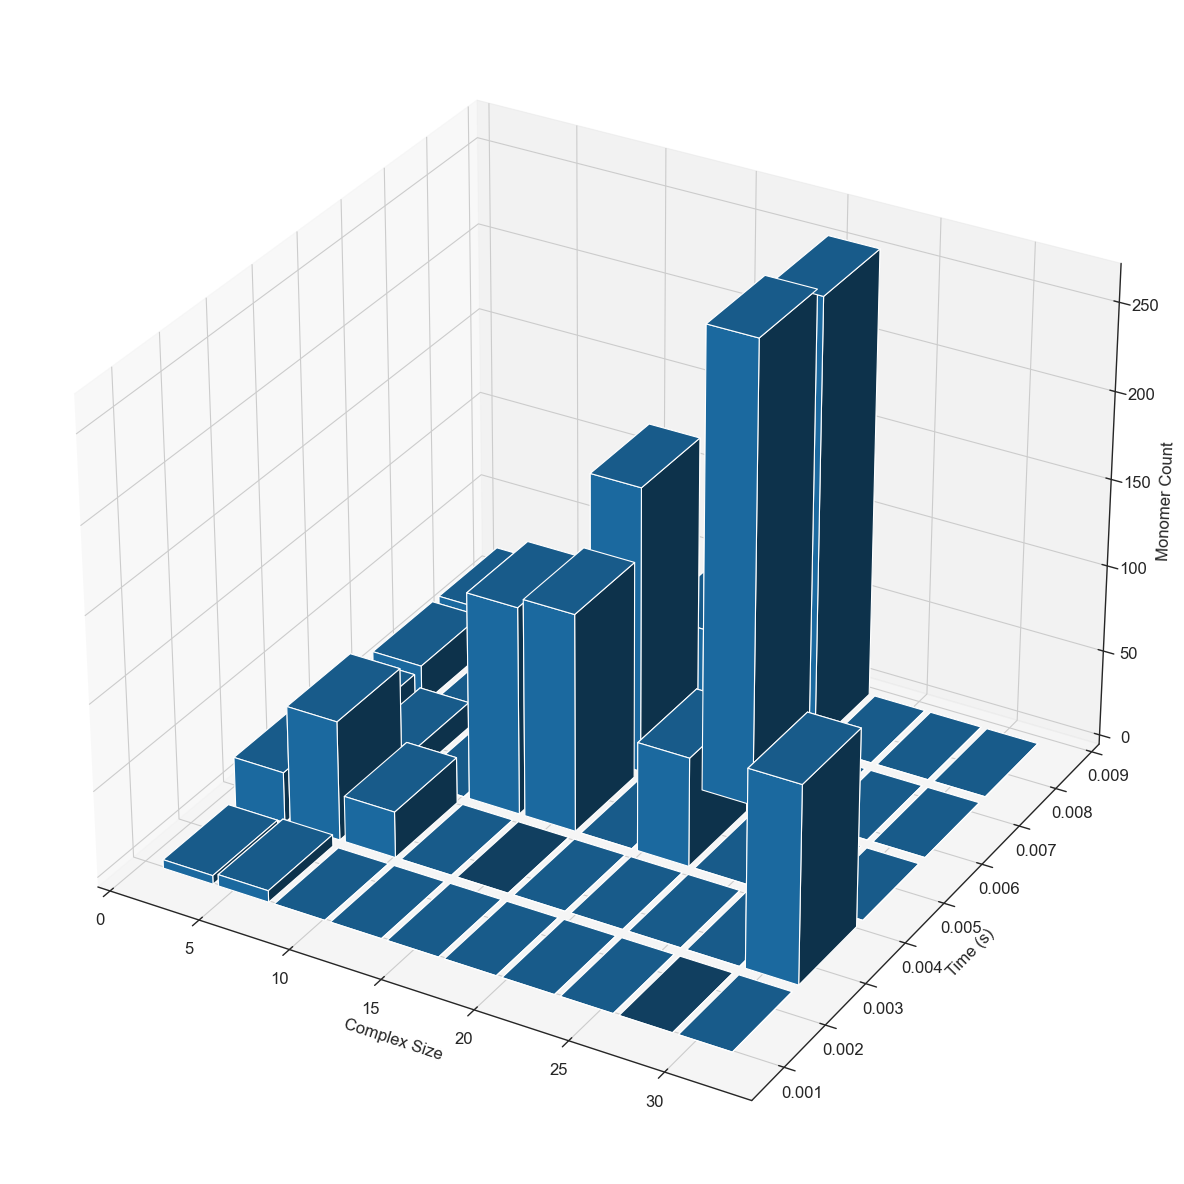

3D plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/3D_hist_monomer_species.svg
Histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/hist_monomer_count_vs_size_3d.csv


In [10]:
analysis_8erq.plot_figure(figure_type='3dhist', x='size', y='time', z='monomer_count', legend=['B'], bins=10, time_bins=5, frequency=False, normalize=False, figure_size=(12, 12))

No simulations specified. Using all available simulations.
Plotting heatmap with:
- x-axis: size
- y-axis: size
- z-axis: complex_count
- Simulations: 3 selected
- Legend: ['A', 'B']
- Display mode: both
X edges: [ 0.   1.5  3.   4.5  6.   7.5  9.  10.5 12.  13.5 15. ]
Y edges: [ 0.   3.1  6.2  9.3 12.4 15.5 18.6 21.7 24.8 27.9 31. ]
Heatmap data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/heatmap_species_a_vs_b.csv


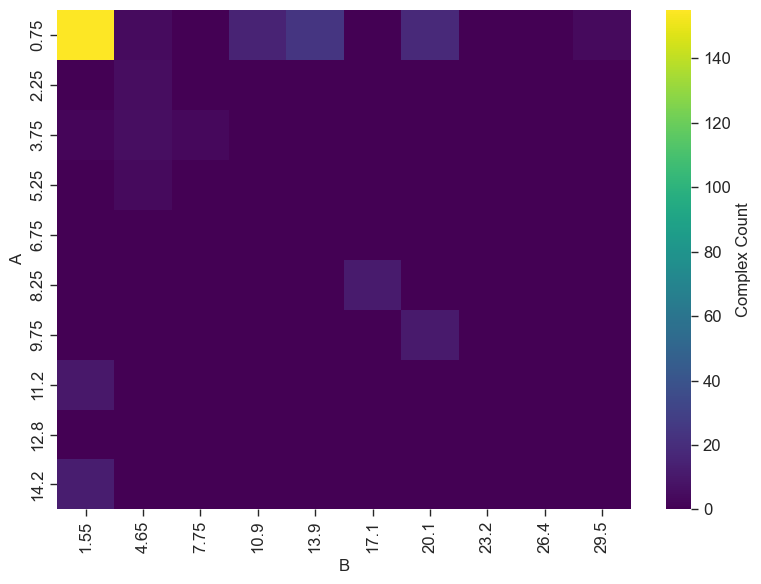

Heatmap plot saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/heatmap_species_a_vs_b.svg


In [4]:
analysis_8erq.plot_figure(figure_type='heatmap', x='size', y='size', z='complex_count', legend=['A', 'B'], bins=10, frequency=False, normalize=False, figure_size=(8, 6))

No simulations specified. Using all available simulations.
Plotting stacked with:
- x-axis: size
- y-axis: complex_count
- z-axis: None
- Simulations: 3 selected
- Legend: ['B: A<2, A=2, A>2']
- Display mode: both


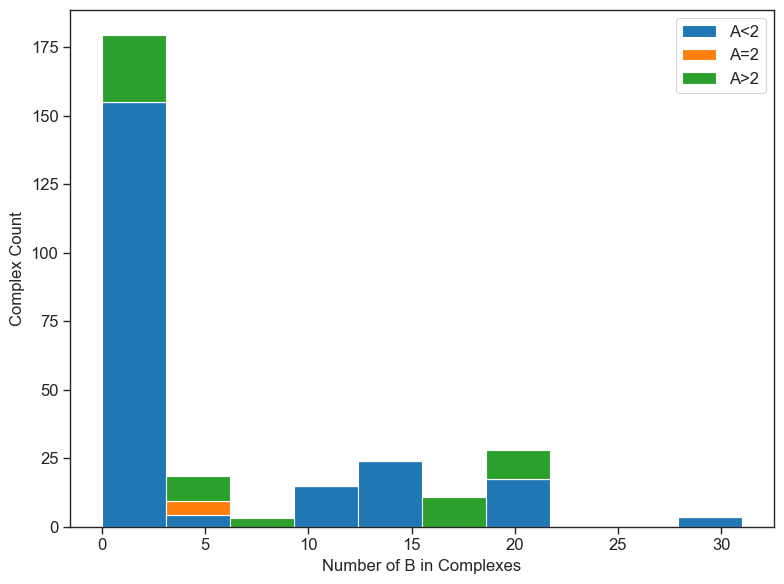

Stacked histogram saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/stacked_hist_complex_species_size.svg
Stacked histogram data saved to /Users/sikao/Documents/GitHub/ionerdss/data/8erq_dir/nerdss_output/figure_plot_data/stacked_hist_complex_species_size.csv


In [3]:
analysis_8erq.plot_figure(figure_type='stacked', x='size', y='complex_count', legend=["B: A<2, A=2, A>2"], bins=10, frequency=False, normalize=False, figure_size=(8, 6))